In [ ]:
import numpy as np
import networkx as nx
from scipy.stats import norm
import cv2
import matplotlib.pyplot as plt

In [ ]:
## Generating the graph of the network
def RecurNet(img, c, s, Theta):
    # size of the image
    m, n = img.shape
    # generate the node list
    Mx = np.arange(1, m + 1)
    My = np.arange(1, n + 1)
    X, Y = np.meshgrid(Mx, My)
    X = X.flatten()
    Y = Y.flatten()
    # node list
    V = np.column_stack((X, Y, img.flatten()))
    V = V[V[:, 2] >= c, :]
    l = V.shape[0]
    # state range
    R = np.max(V[:, 2]) - np.min(V[:, 2])
    # edge list
    F, T = np.meshgrid(np.arange(1, l + 1), np.arange(1, l + 1))
    F = F.flatten()
    T = T.flatten()
    E = np.column_stack((F, T))  # X:start, Y:end
    E = E[E[:, 0] < E[:, 1], :]
    # state difference in percentage
    S_diff = np.abs(V[E[:, 0] - 1, 2] - V[E[:, 1] - 1, 2]) / R
    Ipq = 1 - S_diff
    # distance
    S_dist = np.sqrt((V[E[:, 0] - 1, 0] - V[E[:, 1] - 1, 0]) ** 2 +
                     (V[E[:, 0] - 1, 1] - V[E[:, 1] - 1, 1]) ** 2)
    # Gaussian diminishing effect
    factor_norm = norm.pdf(0, 0, s)
    Dpq = norm.pdf(S_dist, 0, s) / factor_norm
    Wpq = Ipq * Dpq
    E = np.column_stack((E, Wpq))
    E = E[E[:, 2] > Theta, :]
    # Generate Recurrence Network
    G = nx.Graph()
    G.add_weighted_edges_from(E[:, :3])
    return G

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 8863_idx5_x451_y551_class0.png to 8863_idx5_x451_y551_class0.png


In [ ]:
image = cv2.imread('8863_idx5_x451_y551_class0.png')

In [ ]:
def read_img(image):
      image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      image = cv2.resize(image, (30,30))
      return image

In [ ]:
img = read_img(image)
img

array([[169, 170, 177, 175, 206, 163, 162, 159, 166, 170, 163, 159, 159,
        157, 156, 167, 174, 165, 158, 159, 158, 153, 152, 145, 151, 162,
        157, 161, 169, 164],
       [162, 167, 176, 191, 168, 156, 151, 132, 179, 181, 159, 186, 184,
        167, 176, 146, 147, 144, 154, 158, 148, 160, 164, 144, 148, 146,
        148, 165, 161, 156],
       [189, 186, 180, 179, 176, 163, 166, 188, 177, 172, 157, 164, 154,
        149, 163, 171, 156, 140, 157, 150, 143, 147, 155, 161, 159, 168,
        166, 134, 150, 145],
       [163, 188, 186, 202, 192, 176, 187, 162, 146, 167, 133, 158, 163,
        166, 163, 164, 171, 154, 145, 152, 137, 141, 150, 161, 148, 165,
        160, 160, 147, 142],
       [188, 202, 190, 181, 208, 195, 203, 177, 163, 159, 120, 151, 174,
        152, 154, 168, 158, 149, 137, 121, 146, 145, 145, 151, 151, 157,
        152, 154, 146, 140],
       [178, 199, 190, 181, 187, 173, 177, 160, 145, 178, 173, 162, 148,
        155, 159, 152, 143, 152, 150, 138, 144, 150, 147, 138, 135, 133,
        134, 142, 106, 140],
       [182, 196, 195, 186, 165, 147, 143, 113, 126, 146, 146, 152, 150,
        150, 143, 136, 120, 142, 125, 122, 107, 141, 144, 157, 135, 156,
        148, 128, 129, 141],
       [200, 161, 170, 153, 130, 166,  95, 171, 168, 145, 188, 194, 155,
        164, 146, 132, 178, 168, 142, 146, 113, 123, 128, 151,  94,  78,
        158, 213, 184, 133],
       [161, 156, 139, 145, 112, 139, 163, 153, 149, 154, 159, 150, 163,
        109, 173, 175, 112, 157, 144, 124, 171, 185, 187, 185, 145, 136,
        119, 148, 228, 201],
       [140, 136, 142, 162, 150, 147, 147, 128, 134, 163, 148, 163, 140,
        125, 143, 128, 148, 129, 152, 174, 113, 116, 132, 117, 126, 137,
         99, 120, 117, 193],
       [158, 160, 158, 145, 189, 129, 130, 175, 149, 144, 120, 143, 120,
        145, 106, 145, 181, 168, 207, 211, 213, 240, 235, 174, 101, 126,
        161, 153, 117, 105],
       [148, 151, 111, 130, 125, 132, 140, 121, 128, 162, 115, 191, 216,
        182, 168, 158, 146, 134, 106, 112, 149, 130, 121, 100, 112,  94,
        130, 103, 108, 136],
       [155, 142, 143, 124, 143, 124,  99, 134, 114, 144, 231, 200, 121,
        143, 142, 152, 163, 161, 186, 185,  99, 136, 113, 128, 178, 151,
        121, 163, 120, 110],
       [137, 156, 176, 142, 142, 153, 130, 130,  74, 211, 229, 119, 134,
        114, 147, 136, 129, 149, 150,  85, 173, 229, 105, 132,  85,  82,
         62, 123, 158, 114],
       [139, 155, 157, 160, 148, 173, 154, 115, 137, 199, 128, 158, 161,
        182, 155, 141, 137, 107, 102, 114, 124, 152, 187, 161, 118, 149,
        118, 109,  94, 129],
       [170, 154, 155, 152, 149, 173, 150, 148, 120, 147, 124, 156, 138,
        143, 164, 114, 141, 129, 121, 111, 126, 113, 176, 200, 104, 146,
        160, 213, 201, 123],
       [156, 161, 166, 156, 158, 145, 150, 140, 160, 124, 138, 133, 218,
        106, 107,  98, 125, 122, 122, 110, 143, 144,  87, 131, 168, 146,
        182, 157, 106, 127],
       [151, 159, 164, 173, 152, 143, 154, 138, 157, 141, 119, 127, 173,
        114, 162, 190, 118, 120, 142, 112, 110, 137, 151, 164, 159, 177,
        125,  92, 121, 162],
       [150, 156, 143, 172, 140, 137, 160, 148, 152, 144, 138, 143, 125,
        221, 193, 208,  65, 139, 123, 121, 111,  93, 126, 126, 107, 120,
        122, 144, 119,  96],
       [143, 176, 145, 155, 148, 153, 152, 108, 170, 139, 128, 133, 138,
        155, 242, 217,  80, 114, 103, 104, 135, 142, 103, 109, 127,  96,
         95, 126,  75,  99],
       [146, 174, 183, 149, 179, 152, 147, 151, 158, 134, 121, 128, 114,
        112, 240, 205, 127,  94, 129, 151, 108, 120, 101,  99, 113, 134,
        129, 111, 103, 134],
       [147, 150, 162, 172, 189, 148, 121, 165, 153, 140, 138, 124, 107,
        153, 209, 198,  90, 138, 110, 111, 123, 167, 143, 111, 103, 102,
         93, 132, 160, 164],
       [150, 151, 150, 155, 139, 163, 146, 157, 163, 126, 115, 153, 128,
        194, 140, 238, 121, 169,  85,  89, 155, 206,  91,  92, 107,  76,
    

In [ ]:
G = RecurNet(img, 0, 10, 0.85)
G

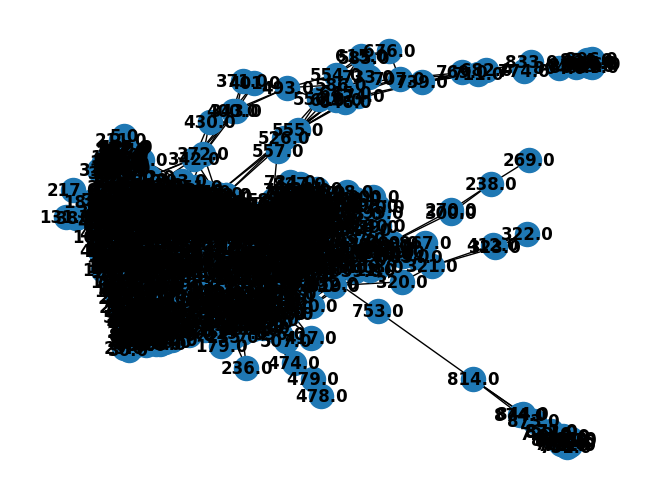

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold')

In [ ]:
def D_BC(G):
    # Network Statistics
    K = np.array(G.degree()).flatten()  # degree


    BC = nx.betweenness_centrality(G)  # betweenness centrality
    print('Basic')


    return K, BC

In [ ]:
D_BC(G)

Basic


(array([  1.,  15.,   2., ...,   9., 900.,   7.]),
 {1.0: 4.740377354445217e-06,
  2.0: 1.751175852701746e-05,
  3.0: 7.452872279876018e-05,
  4.0: 0.00016681539481051177,
  6.0: 0.0016854985834270453,
  7.0: 0.0006555448886564472,
  8.0: 6.476085658641756e-05,
  9.0: 0.0004004361122742082,
  10.0: 0.0007808906644656172,
  11.0: 0.0009547371058312427,
  12.0: 0.0008896210989531943,
  13.0: 0.0006719766678885933,
  14.0: 0.000728591433747594,
  15.0: 0.0008421359541641276,
  16.0: 0.0005149446986227402,
  17.0: 0.0002847198382784167,
  18.0: 0.0010494635660657846,
  19.0: 0.0007237823348596546,
  20.0: 0.0008393543027978987,
  21.0: 0.0007118055703025291,
  22.0: 0.000797940558446534,
  23.0: 0.00020210947178562683,
  24.0: 0.00015269819885628747,
  25.0: 0.0004285956447108439,
  26.0: 0.0003298922501849495,
  27.0: 0.00018350488956970246,
  28.0: 2.371455565522955e-05,
  29.0: 5.416980062392596e-07,
  30.0: 2.3388794102165815e-06,
  31.0: 7.659082931329148e-06,
  32.0: 7.61885733287516

In [ ]:
import numpy as np
import networkx as nx

def NetStatL(G):
    # Check if the graph is connected

    K = np.array(list(dict(G.degree()).values()))  # degree
    PL = dict(nx.all_pairs_shortest_path_length(G))
    max_length = max(len(lengths) for lengths in PL.values())
    PL_array = np.array([list(lengths.values()) + [np.nan] * (max_length - len(lengths)) for lengths in PL.values()])

    m, n = PL_array.shape
    for i in range(n - 1):
        PL_array[i + 1:m, i] = 0
    PL_array = PL_array.flatten()
    PL_array = PL_array[PL_array > 0]
    PL_array = PL_array[PL_array != np.inf]

    le = np.mean(PL_array)
    PC = nx.pagerank(G)
    BC = nx.betweenness_centrality(G)  # betweenness centrality
    CC = nx.closeness_centrality(G)  # closeness centrality
    betw = nx.betweenness_centrality(G)  # node betweenness
    AvgND = np.mean([np.mean([G.degree(neighbor) for neighbor in G.neighbors(node)]) for node in G.nodes()])  # average degree of neighboring nodes for every vertex

    return K, le, PC, BC, CC, betw, AvgND

In [ ]:
K, le, PC, BC, CC, betw, AvgND = NetStatL(G)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

def NetFeature(K, le, PC, BC, CC):
    # Degree K
    stat_K_Q0 = np.min(K)
    stat_K_Q1 = np.quantile(K, 0.25)
    stat_K_Q2 = np.quantile(K, 0.50)
    stat_K_Q3 = np.quantile(K, 0.75)
    stat_K_Q4 = np.max(K)
    stat_K_mean = np.mean(K)
    stat_K_sd = np.std(K)
    stat_K_skew = skew(K)
    stat_K_kurtosis = kurtosis(K)

    # Shortest Path: L
    stat_L_Q0 = np.min(le)
    stat_L_Q1 = np.quantile(le, 0.25)
    stat_L_Q2 = np.quantile(le, 0.50)
    stat_L_Q3 = np.quantile(le, 0.75)
    stat_L_Q4 = np.max(le)
    stat_L_mean = np.mean(le)
    stat_L_sd = np.std(le)
    stat_L_skew = skew(le)
    stat_L_kurtosis = kurtosis(le)



    # Pagerank Centrality: PC
    PC = np.array(list(PC.values()))
    stat_PC_Q0 = np.min(PC)
    stat_PC_Q1 = np.quantile(PC, 0.25)
    stat_PC_Q2 = np.quantile(PC, 0.50)
    stat_PC_Q3 = np.quantile(PC, 0.75)
    stat_PC_Q4 = np.max(PC)
    stat_PC_mean = np.mean(PC)
    stat_PC_sd = np.std(PC)
    stat_PC_skew = skew(PC)
    stat_PC_kurtosis = kurtosis(PC)

    # Betweenness Centrality: BC
    BC = np.array(list(BC.values()))
    stat_BC_Q0 = np.min(BC)
    stat_BC_Q1 = np.quantile(BC, 0.25)
    stat_BC_Q2 = np.quantile(BC, 0.50)
    stat_BC_Q3 = np.quantile(BC, 0.75)
    stat_BC_Q4 = np.max(BC)
    stat_BC_mean = np.mean(BC)
    stat_BC_sd = np.std(BC)
    stat_BC_skew = skew(BC)
    stat_BC_kurtosis = kurtosis(BC)

    # Closeness Centrality: CC
    CC = np.array(list(CC.values()))
    stat_CC_Q0 = np.min(CC)
    stat_CC_Q1 = np.quantile(CC, 0.25)
    stat_CC_Q2 = np.quantile(CC, 0.50)
    stat_CC_Q3 = np.quantile(CC, 0.75)
    stat_CC_Q4 = np.max(CC)
    stat_CC_mean = np.mean(CC)
    stat_CC_sd = np.std(CC)
    stat_CC_skew = skew(CC)
    stat_CC_kurtosis = kurtosis(CC)

    T = [stat_K_Q0, stat_K_Q1, stat_K_Q2, stat_K_Q3, stat_K_Q4,
         stat_K_mean, stat_K_sd, stat_K_skew, stat_K_kurtosis,
         stat_L_Q0, stat_L_Q1, stat_L_Q2, stat_L_Q3, stat_L_Q4,
         stat_L_mean, stat_L_sd, stat_L_skew, stat_L_kurtosis,
         stat_PC_Q0, stat_PC_Q1, stat_PC_Q2, stat_PC_Q3, stat_PC_Q4,
         stat_PC_mean, stat_PC_sd, stat_PC_skew, stat_PC_kurtosis,
         stat_BC_Q0, stat_BC_Q1, stat_BC_Q2, stat_BC_Q3, stat_BC_Q4,
         stat_BC_mean, stat_BC_sd, stat_BC_skew, stat_BC_kurtosis,
         stat_CC_Q0, stat_CC_Q1, stat_CC_Q2, stat_CC_Q3, stat_CC_Q4,
         stat_CC_mean, stat_CC_sd, stat_CC_skew, stat_CC_kurtosis]

    Tn = pd.DataFrame([T], columns=[
        'stat_K_Q0', 'stat_K_Q1', 'stat_K_Q2', 'stat_K_Q3', 'stat_K_Q4',
        'stat_K_mean', 'stat_K_sd', 'stat_K_skew', 'stat_K_kurtosis',
        'stat_L_Q0', 'stat_L_Q1', 'stat_L_Q2', 'stat_L_Q3', 'stat_L_Q4',
        'stat_L_mean', 'stat_L_sd', 'stat_L_skew', 'stat_L_kurtosis',
        'stat_PC_Q0', 'stat_PC_Q1', 'stat_PC_Q2', 'stat_PC_Q3', 'stat_PC_Q4',
        'stat_PC_mean', 'stat_PC_sd', 'stat_PC_skew', 'stat_PC_kurtosis',
        'stat_BC_Q0', 'stat_BC_Q1', 'stat_BC_Q2', 'stat_BC_Q3', 'stat_BC_Q4',
        'stat_BC_mean', 'stat_BC_sd', 'stat_BC_skew', 'stat_BC_kurtosis',
        'stat_CC_Q0', 'stat_CC_Q1', 'stat_CC_Q2', 'stat_CC_Q3', 'stat_CC_Q4',
        'stat_CC_mean', 'stat_CC_sd', 'stat_CC_skew', 'stat_CC_kurtosis'
    ])

    return Tn, T



In [ ]:
T, Tn = NetFeature(K, le, PC, BC, CC)

In [ ]:
T